## Relembrando...
Como visto na aula de cálculo lambda, em 1960 McCarthy publicou o paper **"Recursive Functions of Symbolic Expressions and Their Computation by Machine, Part I** (sim, esse era o nome)
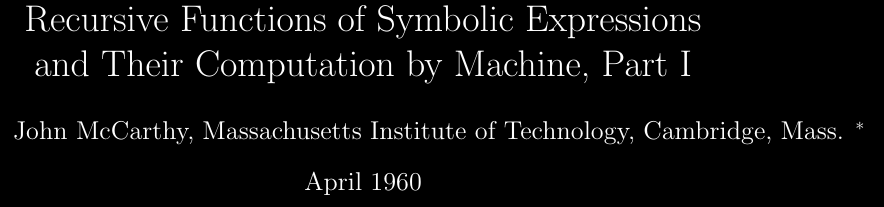

* Apesar do paper ser de 1960, a primeira versão de LISP é de 1958.

Nesse paper é descrito a primeira versão da linguagem LISP, sendo usado como principal inspiração o cálculo lambda (inclusive a sintaxe).

## Além do SCHEME.
Vamos dar um breve contexto sobre os outros LISPs

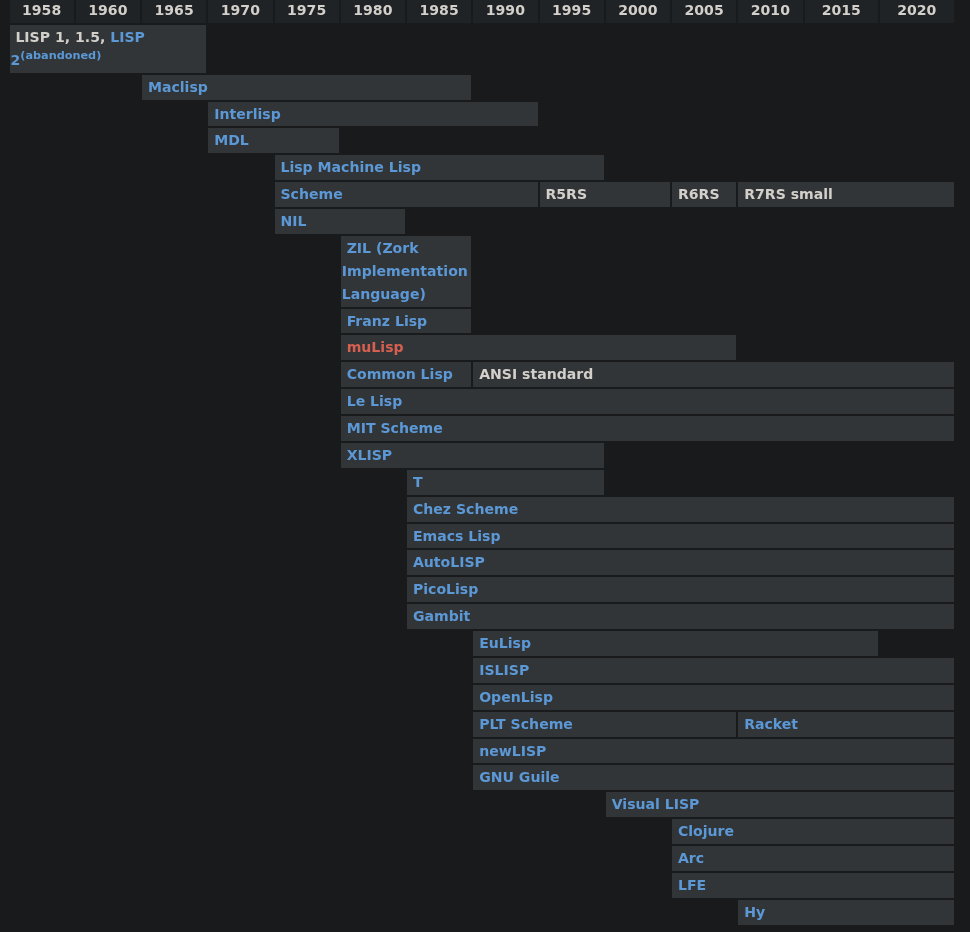

Como podem ver, ficariamos o curso todo falando e não cobririamos todos...

## Por que disso?
Como vimos na segunda aula de Scheme, LISP é uma linguagem muito simples de ser implementada e, sendo assim, muito simples de ser modificada.]

Existem diferentes versões de LISP para cada caso, por exemplo, Common Lisp é uma linguagem imperativa, Scheme é um pouco mais funcional e Clojure é funcional.

Pequenas mudanças na filosofia geraram novas linguagens que possuem, em comum, os principios de um LISP, para além da sintaxe.

## Mas o que é funcional?
Python é funcional?
- **Não**.

C é funcional?
- **Nem perto**.

Uma linguagem é dita funcional quando ela assume uma verdade muito simples: **TODA FUNÇÃO É PURA**.

Mas o que é uma função pura? É uma função que segue duas regras básicas:

- Para a mesma entrada (mesmos argumentos) temos a mesma saida (transparência referencial);
- A função não produz efeitos colaterais, ou seja, não existe mutação de nenhuma váriavel não local.


Partindo desse pressuposto, o máximo que uma linguagem 100% funcional pode fazer é um computador esquentar, na realidade nem isso, visto que isso seria um efeito colateral.

## Então como existem linguagens funcionais?
A idéia central é tornar difícil a criação de funções não puras, ou encapsulando em abstrações complicadas (monâdas em haskell) ou oferendo poucos recursos, tornando mais trabalhoso.

Ou seja, essas linguagens fazem ser muito mais fácil criar várias funções puras e compor até o uso em uma função não pura! No fim, o programador é encorajado a seguir determinado paradgima, da mesma forma que toda linguagem orientada a objetos facilita a vida de quem divide tudo em zilhões de classes.

## Outros conceitos

Essa limitação de funções puras acaba gerando uma certa dificuldade, se não impossibilidade, na implementação de estruturas de dados "clássicas" e, por conta disso, toda boa linguagem majoritariamente funcional traz consigo as chamadas estruturas de dados **persistentes**.

No geral, são estruturas de dados imutáveis que sempre preservam sua versão anterior em si mesma.

Como assim? Pense em uma lista ligada:

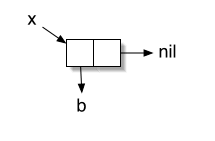

Agora, adcionemos um elemento **x** ligado a **b**

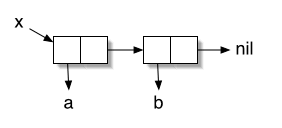

Por fim, adicionemos um elemento **y** ligado a **a**

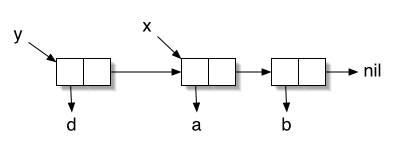

Percebe como, em cada adição, a estrura anterior continua presente?

No geral, o que linguagens funcioanais fazem é que toda "modificação" em uma estrutura de dados gera uma **nova** estrutura que é retornada, para esse conceito damos o nome de **estruturas puramente funcionais**, que prezam por: persistência, cópia rápida e segurança (de thread).

Existem diversas técnicas de otimizações para isso, como tradas no livro do Chris Okasaki:
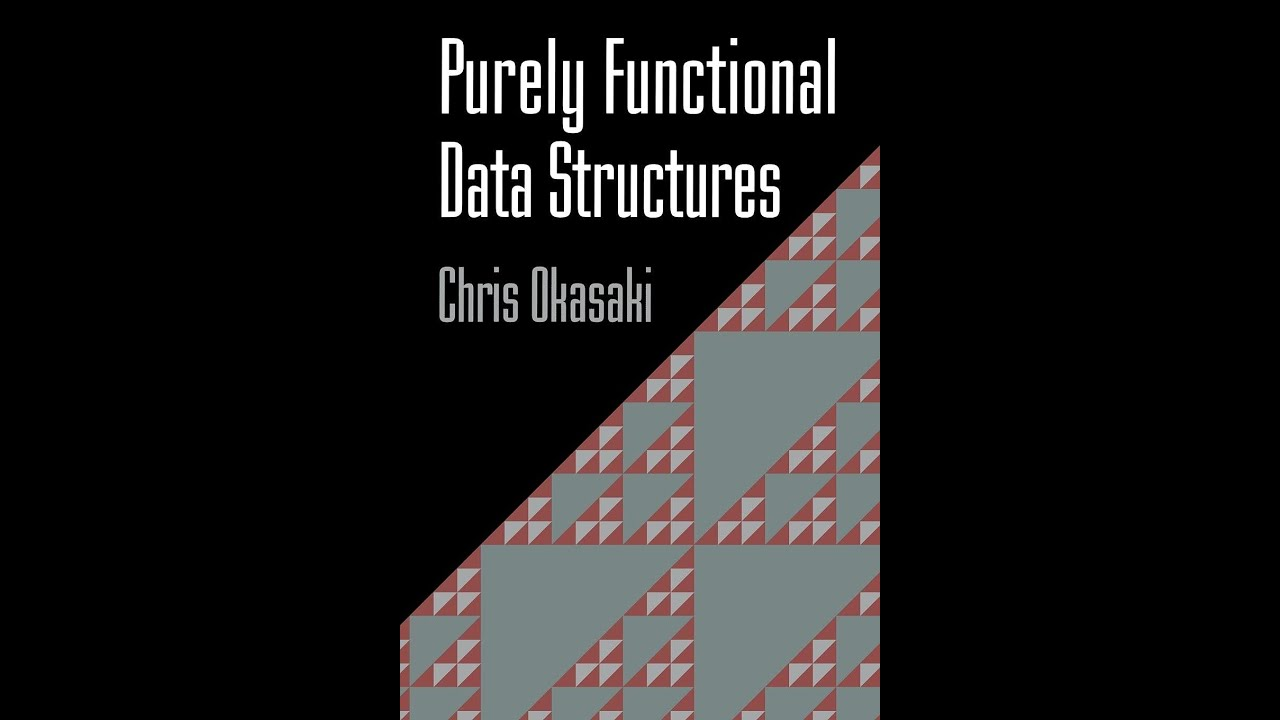

Por exemplo, em Clojure, mapas, conjuntos e **vetores** (sim, vetores) são [Hash Array Mapped Trie (HAMT)](https://infoscience.epfl.ch/server/api/core/bitstreams/f66a3023-2cd0-4b26-af6e-91a9a6ae7450/content), mas isso foge completamente do escopo da disciplina.

Por fim, um outro conceito que será explorado mais a frente é o conceito de avaliação preguiçosa, ou laziness, que, em resumo, é quando uma função (um programa) espera até o momento em que algo (uma váriavel, uma função, um elemento de uma estrutura) é usado para calcular seu valor. Esse conceito é bem comum para estrutura de dados puramente funcionais.

## Chega de teoria, vamos para a prática em Scheme!

### Questão

Escreva uma função que receba três parâmetros (`base`, `first` e `second`) e retorne:
* `1` se `base` for igual a `first`
* `2` se `base` for igual a `second`
* `0` se `base` não for igual a `first` nem `second`

### Considere a seguinte função
~~~scheme
(define (my-equal a b)
  (format #t "evaluating ~a = ~b" a b)
  (= a b))
~~~

### Questão

Escreva qual resultado você verá na função abaixo antes de executá-la:
~~~scheme
(my-equal 1 1)
~~~

## Questão

Escreva qual resultado você verá na função abaixo antes de executá-la:

~~~scheme
(my-equal 1 0)
~~~

### Analise

Depois de responder, verifique os seus resultados:

In [4]:
(define (my-equal a b)
  (format #t "evaluating ~a = ~b" a b)
  (= a b))

### Questão

Considerando que você vai alterar a função de comparação por `my-equal` na sua função, quais os resultados que prevê para os três seguintes casos:
* caso 1: `(fs 5 5 17)`
* caso 2: `(fs 7 3 7)`
* caso 3: `(fs 8 9 10)`

### Questão
Como fica a chamada
```scheme
(define lista '(1 2 3))
(+ (car lista) (cadr lista) (caddr lista))
```

a) Se fosse avaliada de forma estrita?

b) Se fosse avaliada de forma preguiçosa?

## Níveis de Abstrações e Modularização com `define`

Podemos utilizar `define` dentro de `define`, exemplo:
```scheme
(define (func x)
  (define y 2)
  (+ x y))
```

## Questão

Defina uma função `fibonacci` que receba como parâmetro `n` e retorne os n primeiros números da sequência de Fibonacci.

### Questão
Dado o seguinte código em python:
```python
memo = {}

def misterio(a, b):
    if (a, b) in memo:
        return memo[(a, b)]

    if b == 0:
        return a
    else:
        memo[(a, b)] = misterio(b, a % b)

    return memo[(a, b)]
```
Responda:

a) O que essa função faz?

b) Ela é pura?

c) Como ficaria uma implementação pura?

d) Sabendo que em Guile existem as funções:

- make-hash-table, que cria uma hash-table;
- hash-ref, que recebe um hash-table e uma chave e retorna o valor associado a essa chave, se ele existe, e #f caso contrário;
- hash-set!, que recebe uma hash-table, uma chave e um valor e associa a chave ao valor no hash-table.

Exemplo de uso:
```scheme
(define ht (make-hash-table))
(hash-set! ht 'dois 2)
(hash-ref ht 'dois) ; -> 2
(hash-ref ht 'tres) ; -> #f
```

Escreva a implementação **pura** em Guile.

### Questão

O `hash-table` do Scheme é uma estrutura de dados persistente? É uma estrutura de dados puramente funcional? Por quê?

### Questão
Como podemos implementar o código:
```python
def soma_lista(lst, x):
    soma = 0
    for y in lst:
        soma += y
    return soma
```

In [ ]:
def soma_lista(lst, x):
    soma = 0
    for y in lst:
        soma += y
    return soma